# K-Nearest Neighbors Implementation

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# Generate dataset for 2 classes

mean0 = np.array([1, 2])
mean1 = np.array([5, 6])
cov0 = np.array([[1.1, 0.15], [0.15, 1.2]])
cov1 = np.array([[1.1, 0.10], [0.10, 1.2]])
n = 320

X0 = np.random.multivariate_normal(mean0, cov0, n)
X1 = np.random.multivariate_normal(mean1, cov1, n)

print(X0.shape, X1.shape)

# Merge the classes

X = np.vstack((X0, X1))
y = np.vstack((np.zeros((n, 1)), np.ones((n, 1)) ))
y = y.reshape((-1, ))

print(X.shape, y.shape)

(320, 2) (320, 2)
(640, 2) (640,)


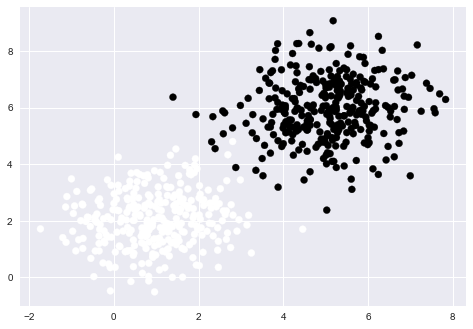

In [3]:
# Visualize the dataset

plt.style.use('seaborn')
plt.scatter(X[:, 0], X[:, 1], c=y.reshape((-1, )) )
plt.show()

In [4]:
# Euclidean distance
def dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

def knn_predict(X, y, query_x, k = 5):
    vals = []
    
    for i in range(X.shape[0]):
        d = dist(X[i], query_x)
        vals.append((d, y[i]))
    
    vals = sorted(vals)
    vals = np.array(vals[:k])
    
    vals = np.unique(vals[:, 1], return_counts=True)
    ind = np.argmax(vals[1])
    pred = vals[0][ind]
    
    return pred

[(array([1, 2]), 0), (array([3, 4]), 1), (array([5, 6]), 1)]


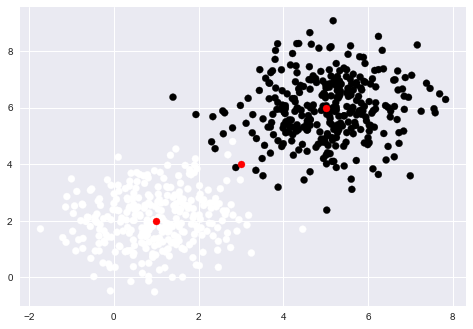

In [5]:
# Make predctions

query_pts = np.array([ [1, 2], [3, 4], [5, 6] ])

pred = []
for i in range(query_pts.shape[0]):
    p = knn_predict(X, y, query_pts[i], k = 7)
    pred.append((query_pts[i], int(p)))

print(pred)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(query_pts[:, 0], query_pts[:, 1], c='r')
plt.show()